In [27]:
import pandas as pd

from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('application_train.csv')

## Предобработка данных 

In [14]:
mis_val_percent = (100 * pd.isnull(df).sum() / len(df)).sort_values(ascending = False)[:15]

In [15]:
for col in mis_val_percent.index:
    if(mis_val_percent[col] > 80):
        del df[col]

In [16]:
y = df['TARGET']

del df['TARGET']
del df['SK_ID_CURR']

In [17]:
num_cols = df.select_dtypes(exclude = ["object"]).columns
categ_cols = df.select_dtypes(include = ["object"]).columns

In [18]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [19]:
for col in categ_cols:
    df[col] =df[col].fillna('None')

## Кодирование

In [20]:
df = pd.get_dummies(df)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
def encoder(df):
    scaler = MinMaxScaler()
    numerical = df.select_dtypes(exclude = ["object"]).columns
    features_transform = pd.DataFrame(data= df)
    features_transform[numerical] = scaler.fit_transform(df[numerical])
    display(features_transform.head(n = 5))
    return df

df_scaled = encoder(df)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_None,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_None,EMERGENCYSTATE_MODE_Yes
0,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.888839,0.045086,0.852140,0.705433,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,0.477114,0.043648,0.951929,0.959566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,0.348534,0.046161,0.827335,0.648326,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,0.350846,0.038817,0.601451,0.661387,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,0.298591,0.038820,0.825268,0.519522,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Моделирование

In [23]:
from sklearn.tree import DecisionTreeClassifier

#### Глубина дерева

In [25]:
max_depth = []
x = []

for i in [2, 3, 5, 10, 15, 20, 30]:
    clf = DecisionTreeClassifier(random_state=0, max_depth = i)
    scores = cross_val_score(clf, df_scaled, y, cv=3, scoring='roc_auc')
    max_depth.append(scores.mean())
    x.append(i)

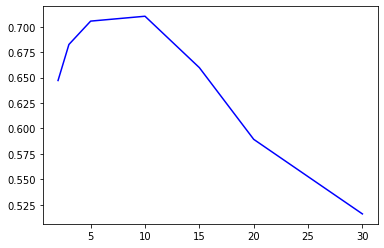

In [29]:
plt.plot(x, max_depth, 'b')

#### min_samples_split

In [34]:
min_samples_split = []
x_min_samples_split = []

for i in [10, 50, 100, 150, 200]:
    clf = DecisionTreeClassifier(random_state=0, min_samples_split = i)
    scores = cross_val_score(clf, df_scaled, y, cv=3, scoring='roc_auc')
    min_samples_split.append(scores.mean())
    x_min_samples_split.append(i)

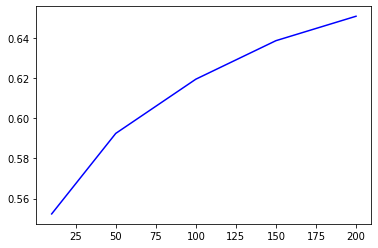

In [35]:
plt.plot(x_min_samples_split, min_samples_split, 'b')

#### min_samples_leaf

In [36]:
min_samples_leaf = []
x_min_samples_leaf = []

for i in [2, 3, 5, 10, 15, 30]:
    clf = DecisionTreeClassifier(random_state=0, min_samples_leaf = i)
    scores = cross_val_score(clf, df_scaled, y, cv=3, scoring='roc_auc')
    min_samples_leaf.append(scores.mean())
    x_min_samples_leaf.append(i)

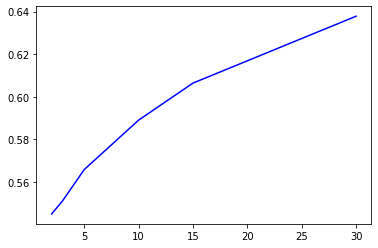

In [37]:
plt.plot(x_min_samples_leaf, min_samples_leaf, 'b')

## GridSearch

In [41]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [5, 8, 10],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy'],
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters).fit(df_scaled, y)

In [42]:
clf.best_score_

0.9192711805397202

In [43]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}